In [98]:
import cv2,os

data_path='true dataset 2\Vedic dataset'

In [99]:
categories=os.listdir(data_path)

In [100]:
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels)) 

print(label_dict)
print(categories)
print(labels)

{'diya': 0, 'kalash': 1, 'om': 2, 'sankh': 3, 'sriyantra': 4, 'swastika': 5}
['diya', 'kalash', 'om', 'sankh', 'sriyantra', 'swastika']
[0, 1, 2, 3, 4, 5]


In [101]:
img_size=100
data=[]
target=[]


for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)

        try:
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)           
           
            resized=cv2.resize(gray,(img_size,img_size))
          
            data.append(resized)
            target.append(label_dict[category])
           
        except Exception as e:
            print('Exception:',e)


In [102]:
import numpy as np

data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
target=np.array(target)

from keras.utils import np_utils

new_target=np_utils.to_categorical(target)

In [103]:
np.save('data',data)
np.save('target',new_target)

In [104]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')

In [105]:
target.shape, data.shape  #category in target#

((3390, 6), (3390, 100, 100, 1))

In [106]:
target[1]

array([1., 0., 0., 0., 0., 0.], dtype=float32)

In [107]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(50,activation='relu'))

model.add(Dense(6,activation='softmax'))


model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [108]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [109]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=False,mode='auto')
history=model.fit(train_data,train_target,epochs=12,callbacks=[checkpoint],validation_split=0.2)


Train on 2440 samples, validate on 611 samples
Epoch 1/12
2440/2440 [==============================] - 97s 40ms/step - loss: 1.5951 - accuracy: 0.3488 - val_loss: 1.3881 - val_accuracy: 0.4615
Epoch 2/12
2440/2440 [==============================] - 97s 40ms/step - loss: 1.1926 - accuracy: 0.5348 - val_loss: 1.0442 - val_accuracy: 0.6007
Epoch 3/12
2440/2440 [==============================] - 100s 41ms/step - loss: 0.8289 - accuracy: 0.6963 - val_loss: 0.8172 - val_accuracy: 0.6956
Epoch 4/12
2440/2440 [==============================] - 99s 41ms/step - loss: 0.6028 - accuracy: 0.7750 - val_loss: 0.8232 - val_accuracy: 0.7283
Epoch 5/12
2440/2440 [==============================] - 121s 49ms/step - loss: 0.4244 - accuracy: 0.8533 - val_loss: 0.7030 - val_accuracy: 0.7512
Epoch 6/12
2440/2440 [==============================] - 143s 59ms/step - loss: 0.3014 - accuracy: 0.8955 - val_loss: 0.7703 - val_accuracy: 0.7529
Epoch 7/12
2440/2440 [==============================] - 144s 59ms/step - l

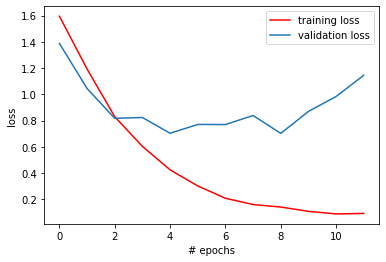

In [111]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()



In [ ]:
model.save('Classifier Step 1')

In [112]:
print(model.evaluate(test_data,test_target))

339/339 [==============================] - 5s 15ms/sample - loss: 0.7923 - acc: 0.7316
[0.792290723253492, 0.73156345]


In [128]:
from tensorflow import keras
model = keras.models.load_model('model-010.model')


In [118]:
print(model.evaluate(test_data,test_target))

ValueError: A target array with shape (339, 6) was passed for an output of shape (None, 2) while using as loss `categorical_crossentropy`. This loss expects targets to have the same shape as the output.

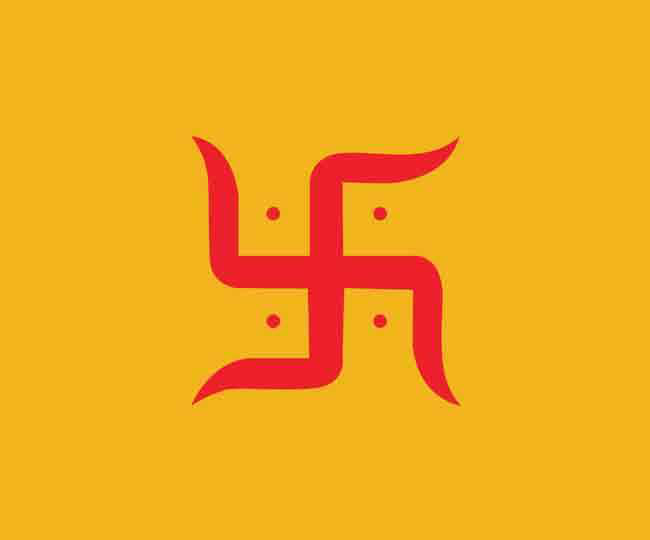

2 OM


In [129]:
results={
   0:'Diya',
   1:'Kalash',
   2:'OM',
   3:'Sankh',
   4:'Sriyantra',
   5:'Swastik',
 
}
from PIL import Image
import numpy as np
im=Image.open("test.jpg")
display(im)

im=cv2.cvtColor(np.float32(im),cv2.COLOR_BGR2GRAY)

im=cv2.resize(im,(img_size,img_size))
im=np.resize(im,(1,100,100,1))
im=np.array(im)/255.0
pred=model.predict_classes([im])[0]
print(pred,results[pred])


[[[[0.5585686]
   [0.5585686]
   [0.5585686]
   ...
   [0.5585686]
   [0.5585686]
   [0.5585686]]

  [[0.5585686]
   [0.5585686]
   [0.5585686]
   ...
   [0.5585686]
   [0.5585686]
   [0.5585686]]

  [[0.5585686]
   [0.5585686]
   [0.5585686]
   ...
   [0.5585686]
   [0.5585686]
   [0.5585686]]

  ...

  [[0.5585686]
   [0.5585686]
   [0.5585686]
   ...
   [0.5585686]
   [0.5585686]
   [0.5585686]]

  [[0.5585686]
   [0.5585686]
   [0.5585686]
   ...
   [0.5585686]
   [0.5585686]
   [0.5585686]]

  [[0.5585686]
   [0.5585686]
   [0.5585686]
   ...
   [0.5585686]
   [0.5585686]
   [0.5585686]]]]
